<a href="https://www.kaggle.com/code/mrsimple07/waiter-tip-analysis?scriptVersionId=163844487" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/waiter-tip-prediction/tips.csv


In [2]:
import pandas as pd
df= pd.read_csv('/kaggle/input/waiter-tip-prediction/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


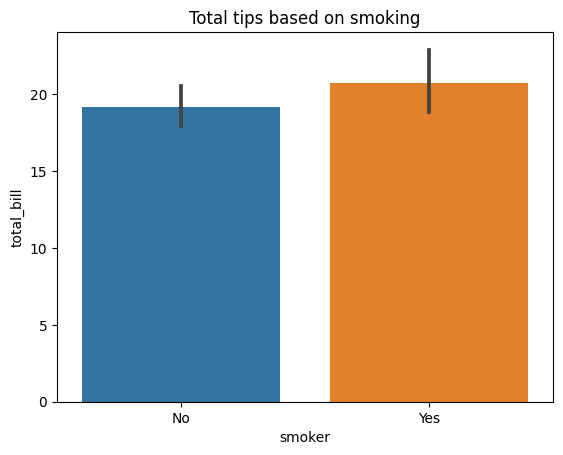

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.barplot(x = df['smoker'], y = df['total_bill'])
plt.title('Total tips based on smoking')
plt.show()

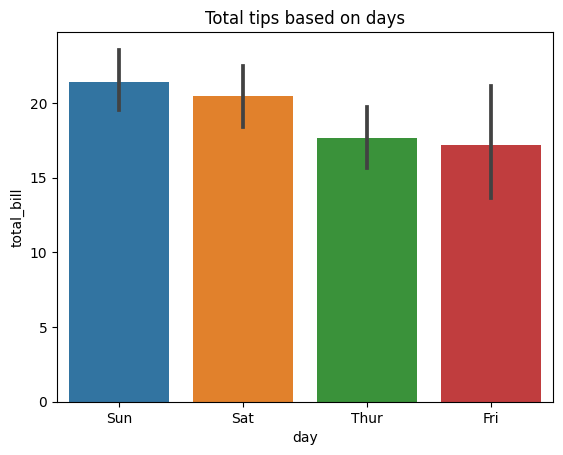

In [4]:
sns.barplot(x = df['day'], y = df['total_bill'])
plt.title('Total tips based on days')
plt.show()

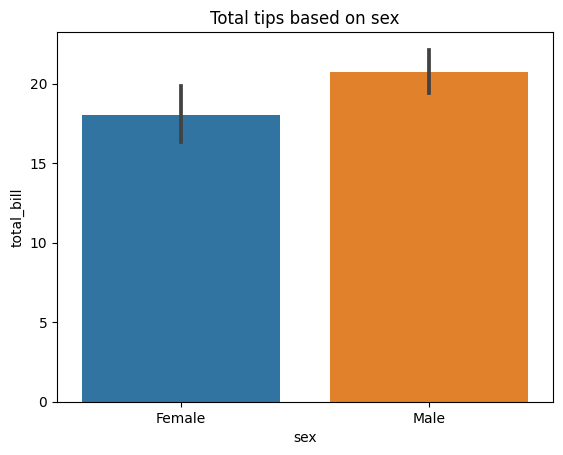

In [5]:
sns.barplot(x = df['sex'], y = df['total_bill'])
plt.title('Total tips based on sex')
plt.show()

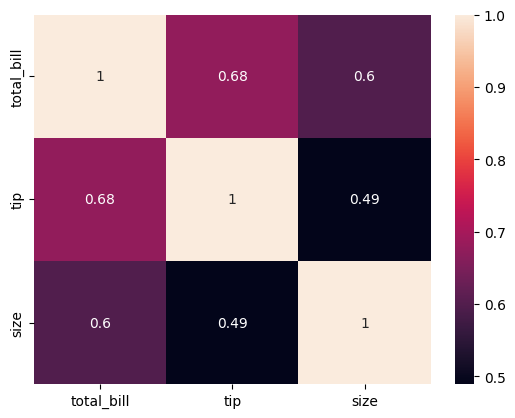

In [6]:
correlation_matrix = df[['total_bill','tip', 'size']].corr()
sns.heatmap(correlation_matrix, annot = True)
plt.show()

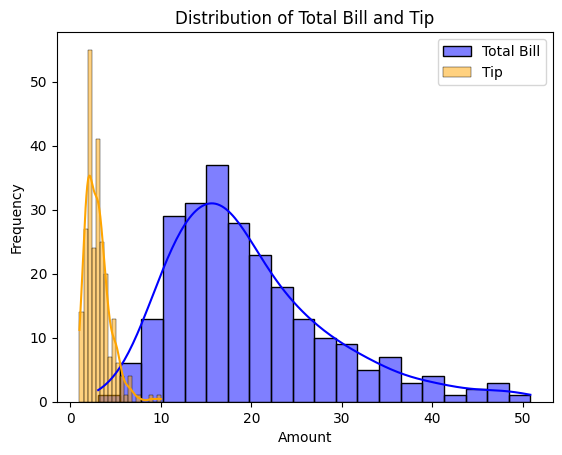

In [7]:
sns.histplot(df['total_bill'], bins=20, kde=True, color='blue', label='Total Bill')
sns.histplot(df['tip'], bins=20, kde=True, color='orange', label='Tip')
plt.title('Distribution of Total Bill and Tip')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()

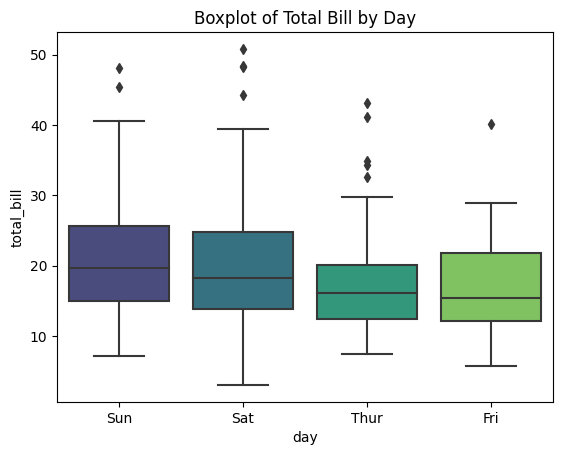

In [8]:
sns.boxplot(x='day', y='total_bill', data=df, palette='viridis')
plt.title('Boxplot of Total Bill by Day')
plt.show()

In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


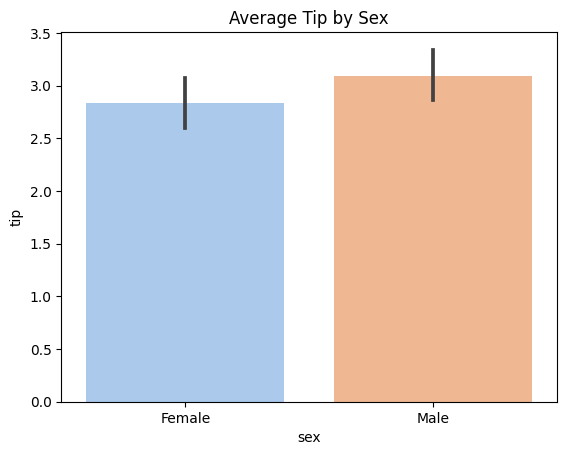

In [10]:
sns.barplot(x='sex', y='tip', data=df, palette='pastel')
plt.title('Average Tip by Sex')
plt.show()

In [11]:
#One-hot encoding
df= pd.get_dummies(df, columns = ['sex', 'smoker', 'day','time'], drop_first =True)
df.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


Prediction Tip based on Total Bill

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

X, y = df.drop(['tip'], axis=1), df['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Predicted values:", y_pred)
print("Actual values:", y_test)


Predicted values: [2.91436632 2.00292613 3.96425583 3.76380832 2.14836306 2.67423448
 3.63934628 2.29147245 2.57207155 2.45851225 2.90446763 2.0573337
 2.11817193 2.35130838 1.82976215 3.10830675 2.95140176 3.21602976
 2.56640892 5.73957295 3.43490366 3.22645102 2.17139823 1.94180002
 3.16394533 2.24547894 2.14497574 3.21025435 3.20097595 6.66803147
 5.01111235 1.57804024 3.1909877  2.76652194 2.98412862 3.85695724
 2.17008741 5.46673999 2.35586827 2.99190732 2.03271177 2.48465991
 3.44046814 2.35532237 1.92528104 0.87348926 1.81911521 3.04083954
 1.85436902]
Actual values: 24     3.18
6      2.00
153    2.00
211    5.16
198    2.00
176    2.00
192    2.56
124    2.52
9      3.23
101    3.00
45     3.00
233    1.47
117    1.50
177    2.00
82     1.83
146    1.36
200    4.00
15     3.92
66     2.47
142    5.00
33     2.45
19     3.35
109    4.00
30     1.45
186    3.50
120    2.31
10     1.71
73     5.00
159    2.00
156    5.00
112    4.00
218    1.44
25     2.34
60     3.21
18     3.50

In [13]:
print(mean_squared_error(y_test, y_pred))

0.7033566017436106
